In [1]:
import os
import pandas as pd 
import datetime as dt
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import yfinance as yf
from pdb import set_trace as keyboard
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from IPython.display import Image

#width = int(1920/2)
#height = int(1080/2)
#WINDOW_SIZE = "%s, %s" % (width, height)

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")
#chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
from bs4 import BeautifulSoup

loggedIn = False


In [2]:
if not loggedIn:
    browser = webdriver.Chrome(options=chrome_options, 
                               executable_path='C:/ChromeDriver/chromedriver.exe')
    browser.get('https://eduardocavalcanti.com/login/')


    username = browser.find_element_by_id('input_0')
    username.send_keys("carlosfaria310@gmail.com")

    password = browser.find_element_by_id('input_1')
    password.send_keys("rioclaro")

    time.sleep(1)
    browser.find_element_by_css_selector('[type=submit]').click()
    #browser.find_element_by_id('arm_form_field_container_453').click()

    loggedIn = True
    
print("Connection established")
time.sleep(3)

Connection established


In [3]:
stockTicker = 'FRAS3'

time.sleep(2)
browser.get('https://eduardocavalcanti.com/an_fundamentalista/%s' % stockTicker[:4])
time.sleep(2)

In [4]:
#browser.find_element_by_xpath('//div[@class="envelope"][@style="overflow:auto"]')
tableData = browser.find_element_by_xpath('//table[@class="table table-hover table-condensed table-responsive analise"]').text.split('\n')
tableData_preDF = [i.replace(' % ', ' 0 ').replace(' %', '%').split(' ') for i in tableData[1:]]

In [5]:
cols = ['Ano', 'Patrim. Líq.', 'Receita Líq.', 'EBITDA', 'D&A', 'EBIT', 'Mrg. EBIT', 'Result. Fin.', 
       'Impostos', '%% Impostos', 'Lucro Líq.', 'Margem Líq.', 'ROE', 'Caixa', 'Dívida Bruta', 
       'Dívida Líq.', 'Dív. Bru./PL', 'Dív.Líq./EBITDA', 'FCO', 'CAPEX', 'FCF', 'FCL ex-CAPEX', 
       'CAPEX/FCO', 'Proventos', 'Payout', '%% Anual']

cols_2 = ['Ano', 'Patrim. Líq.', 'Receita Inter. Fin.', 'Luco Líq', 'Margem', 'ROE', 'Índ. de Basiléia', 'PDD', 
       'PDD/Lucro Líq.', 'Proventos', 'Payout', '% Anual']

try:
    fund_df1 = pd.DataFrame(tableData_preDF, columns=cols)
except:
    fund_df1 = pd.DataFrame(tableData_preDF, columns=cols_2)
#fund_df1 = pd.DataFrame(tableData_preDF)
fund_df1 = fund_df1.set_index(fund_df1.iloc[:,0])
#fund_df1.drop(fund_df1.columns[0], axis=1)
fund_df1.drop("Ano", axis=1, inplace=True)
fund_df1.index.name = None

### Replace . por ''!!!!!

fund_df1['Dív.Líq./EBITDA'] = np.round(fund_df1['Dívida Líq.'].apply(lambda x: x.replace('.', '')).astype('float')/fund_df1['EBITDA'].astype('float'), 2)
fund_df1['CAPEX/FCO'] = np.round(fund_df1['CAPEX'].apply(lambda x: x.replace('.', '')).astype('float')/fund_df1['FCO'].astype('float'), 2)

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [9]:
display(fund_df1[10:])

,Patrim. Líq.,Receita Líq.,EBITDA,D&A,EBIT,Mrg. EBIT,Result. Fin.,Impostos,%% Impostos,Lucro Líq.,Margem Líq.,ROE,Caixa,Dívida Bruta,Dívida Líq.,Dív. Bru./PL,Dív.Líq./EBITDA,FCO,CAPEX,FCF,FCL ex-CAPEX,CAPEX/FCO,Proventos,Payout,%% Anual
2005,139,373,60,-14,46,12%,0,-13,28%,33,9%,24%,56,73,17,53%,0.28,43,-30,-7,13,-0.70,11,33%,0%
2006,164,391,70,-15,55,14%,1,-16,29%,40,10%,24%,22,45,23,27%,0.33,48,-30,-2,18,-0.62,12,30%,161%
2007,191,419,79,-17,62,15%,1,-22,35%,41,10%,21%,88,106,18,55%,0.23,42,-28,53,14,-0.67,12,29%,39%
2008,208,432,68,-20,48,11%,-13,-10,29%,25,6%,12%,107,182,75,88%,1.10,36,-52,37,-16,-1.44,12,48%,-17%
2009,293,428,52,-20,32,7%,20,-12,23%,40,9%,14%,205,224,19,76%,0.37,75,-21,45,54,-0.28,10,25%,0%
2010,325,509,76,-21,55,11%,7,-14,23%,48,9%,15%,226,261,35,80%,0.46,50,-40,12,10,-0.80,14,29%,1%
2011,351,546,64,-23,41,8%,15,-13,23%,43,8%,12%,248,321,73,91%,1.14,-66,-56,25,-122,0.85,16,37%,0%
2012,369,663,85,-35,50,8%,-19,-6,19%,25,4%,7%,227,410,183,111%,2.15,36,-67,-2,-31,-1.86,10,40%,97%
2013,396,717,104,-37,67,9%,-17,-10,20%,40,6%,10%,236,409,173,103%,1.66,196,-46,-64,150,-0.23,14,35%,35%
2014,409,765,105,-38,67,9%,-9,-13,22%,45,6%,11%,254,402,148,98%,1.41,95,-39,-46,56,-0.41,16,36%,-9%


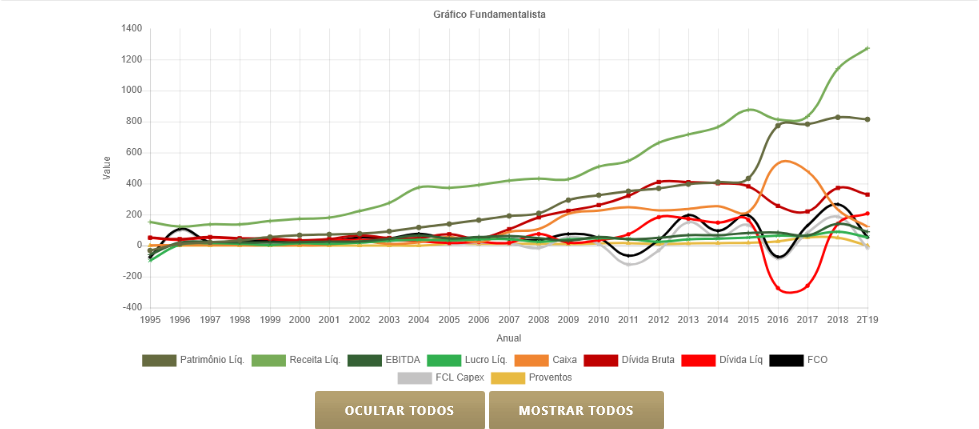

In [8]:
#browser.find_element_by_xpath('//canvas[@id="canvas" and @class="chartjs-render-monitor"]')
browser.set_window_size(1000, 700)
img = browser.find_element_by_xpath('//div[@style="width:100%;"]')
_ = img.screenshot("screenshot.png")


Image(filename='screenshot.png')